## Outlier Detection

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [35]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
data = pd.read_csv('Melbourne_housing_FULL.csv', 
                   usecols=['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount'])

data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,4019.0


In [32]:
data.shape

(34857, 8)

In [31]:
data.isna().sum()

Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
Propertycount        3
dtype: int64

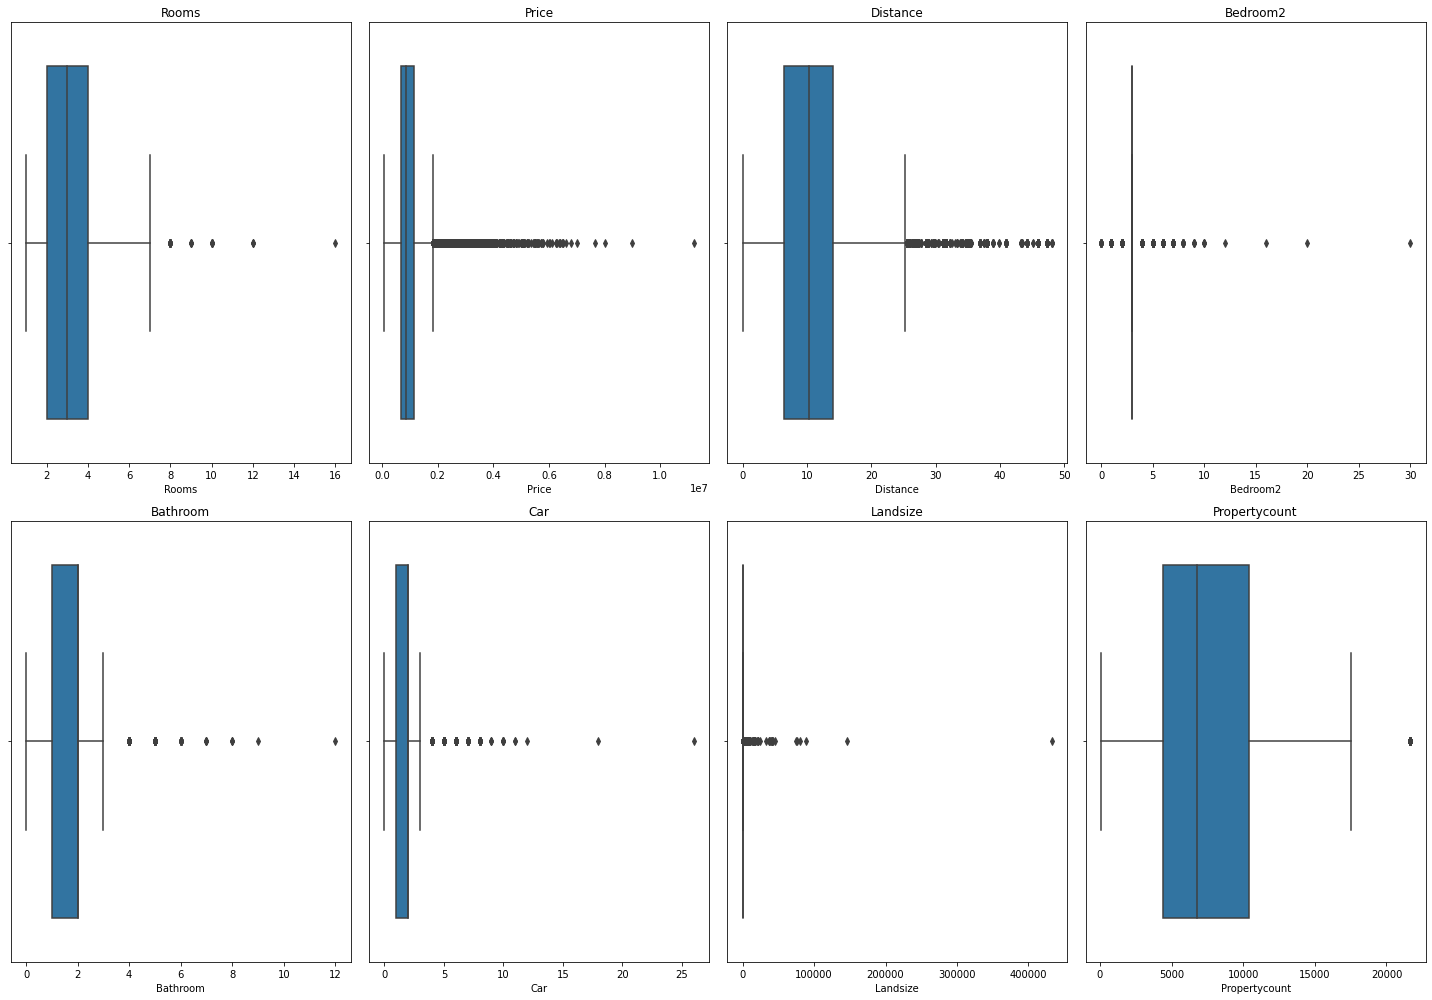

In [82]:
fig = plt.figure(figsize = (20,14))
for i,col in enumerate(data1.columns):
    ax = fig.add_subplot(2,4,i+1)
    sns.boxplot(data1[col])
    ax.set_title(col)
    
fig.tight_layout()
plt.show()

from the above plot we see that there are outliers in each and every feature

In [8]:
def out_std(data, nstd=3.0, return_thresholds = False):
    data_mean, data_std = data.mean(),data.std()
    cut_off = data_std*nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds :
        return lower, upper
    else:
        return [True if x<lower or x>upper else False for x in data]
        

In [10]:
def out_iqr(data, k=1.5, return_thresholds = False):
    q25, q75 = np.percentile(data,25), np.percentile(data,75)
    iqr = q75 - q25
    cut_off = iqr**k
    lower, upper = iqr - cut_off, iqr + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x<lower or x>upper else False for x in data]

In [13]:
data['Rooms'][out_std(data['Rooms'])]

81       6
175      7
426      6
496      6
538      6
        ..
34212    6
34367    6
34412    6
34494    6
34770    6
Name: Rooms, Length: 269, dtype: int64

In [14]:
data['Rooms'][out_iqr(data['Rooms'])]

76       5
81       6
96       5
153      5
175      7
        ..
34807    5
34823    5
34824    5
34836    5
34837    5
Name: Rooms, Length: 2006, dtype: int64

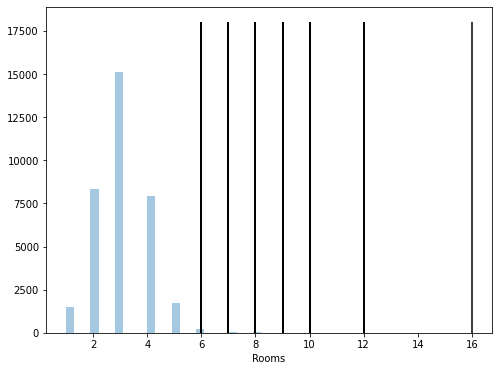

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(data['Rooms'],kde=False)
plt.vlines(data['Rooms'][out_std(data['Rooms'])], ymin = 0 , ymax= 18000);

In [65]:
## zscore multivariate
from scipy.stats import zscore

In [71]:
z = np.abs(zscore(data1))
data1[(z>3).any(axis=1)]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
13,4,870000.0,2.5,6.0,2.0,0.0,230.0,4019.0
81,6,725000.0,13.5,6.0,3.0,2.0,976.0,3464.0
86,3,895000.0,13.5,3.0,1.0,6.0,1063.0,3464.0
104,3,1042000.0,13.5,3.0,2.0,5.0,612.0,3464.0
135,3,2850000.0,3.3,3.0,2.0,0.0,211.0,3280.0
...,...,...,...,...,...,...,...,...
34755,4,1237500.0,10.5,4.0,2.0,7.0,744.0,3755.0
34770,6,665000.0,18.0,3.0,2.0,2.0,521.0,3640.0
34784,3,625000.0,15.3,3.0,1.0,6.0,609.0,7955.0
34809,4,565000.0,44.2,4.0,2.0,6.0,720.0,3988.0


In [73]:
## IQR multivariate

q1, q3 = data1.quantile(0.25), data1.quantile(0.75)
IQR = q3 - q1

data1[((data1 < (q1-(2.0*IQR))) | (data1 > (q3+(2.0*IQR)))).any(axis=1)]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
0,2,870000.0,2.5,2.0,1.0,1.0,126.0,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,4019.0
8,2,870000.0,2.5,4.0,1.0,2.0,201.0,4019.0
10,2,941000.0,2.5,2.0,1.0,0.0,181.0,4019.0
...,...,...,...,...,...,...,...,...
34848,4,621000.0,25.5,4.0,2.0,2.0,375.0,2940.0
34852,4,1480000.0,6.3,4.0,1.0,3.0,593.0,6543.0
34853,2,888000.0,6.3,2.0,2.0,1.0,98.0,6543.0
34854,2,705000.0,6.3,2.0,1.0,2.0,220.0,6543.0


## DBSCAN

In [50]:
data1 = data.copy()
data1.fillna(df.median(),inplace = True)

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X= StandardScaler().fit_transform(data1)
clustering = DBSCAN(eps = 1, min_samples=10).fit(X)
# print(set(clustering.labels_))
data1[clustering.labels_<0]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,4019.0
8,2,870000.0,2.5,4.0,1.0,2.0,201.0,4019.0
9,2,870000.0,2.5,3.0,2.0,1.0,202.0,4019.0
11,3,1876000.0,2.5,4.0,2.0,0.0,245.0,4019.0
13,4,870000.0,2.5,6.0,2.0,0.0,230.0,4019.0
...,...,...,...,...,...,...,...,...
34757,5,1075000.0,10.5,5.0,1.0,2.0,542.0,3755.0
34770,6,665000.0,18.0,3.0,2.0,2.0,521.0,3640.0
34809,4,565000.0,44.2,4.0,2.0,6.0,720.0,3988.0
34823,5,640000.0,14.7,5.0,2.0,4.0,580.0,16166.0


## Isolation Forest

In [95]:
from sklearn.ensemble import IsolationForest


def Iso_outliers(df):
    iso = IsolationForest( behaviour = 'new', random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    df1 = pd.DataFrame()
    df1['cluster'] = preds
#     print(df1['cluster'].value_counts().sort_values(ascending=False))
    return df1['cluster'] ==-1
    

In [96]:
data1[(Iso_outliers(data1))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,4019.0
7,4,870000.0,2.5,3.0,2.0,2.0,400.0,4019.0
9,2,870000.0,2.5,3.0,2.0,1.0,202.0,4019.0
15,3,1000000.0,2.5,3.0,2.0,2.0,521.0,4019.0
17,1,300000.0,2.5,1.0,1.0,1.0,0.0,4019.0
...,...,...,...,...,...,...,...,...
34839,2,475000.0,6.8,3.0,2.0,2.0,521.0,6380.0
34841,2,940000.0,6.8,2.0,2.0,1.0,122.0,6380.0
34847,3,500000.0,25.5,3.0,2.0,2.0,383.0,2940.0
34849,3,570000.0,25.5,3.0,2.0,2.0,404.0,2940.0


## Missing Values 

In [127]:
mel_hou = pd.read_csv('Melbourne_housing_FULL.csv')
mel_hou.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [128]:
mel_hou.shape

(34857, 21)

In [129]:
mel_hou.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

# lattitude and longitude have missing values

In [130]:
mel_hou[mel_hou['Lattitude'].isna()][['Lattitude','Longtitude','Suburb']]

,Lattitude,Longtitude,Suburb
15,NaN,NaN,Abbotsford
16,NaN,NaN,Abbotsford
19,NaN,NaN,Abbotsford
21,NaN,NaN,Abbotsford
22,NaN,NaN,Abbotsford
...,...,...,...
34838,NaN,NaN,Williamstown
34839,NaN,NaN,Williamstown
34840,NaN,NaN,Williamstown
34844,NaN,NaN,Windsor


In [131]:
long_dict = dict(mel_hou.groupby(mel_hou['Suburb'])['Longtitude'].median())
mel_hou['Longtitude'] = mel_hou['Longtitude'].fillna(mel_hou['Suburb'].map(long_dict))


lat_dict = dict(mel_hou.groupby(mel_hou['Suburb'])['Lattitude'].median())
mel_hou['Lattitude'] = mel_hou['Lattitude'].fillna(mel_hou['Suburb'].map(lat_dict))

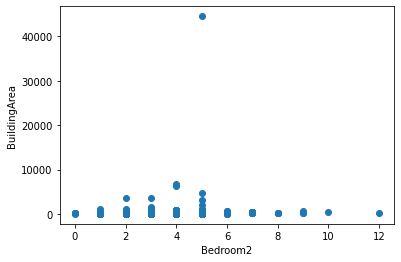

In [133]:
plt.scatter(mel_hou['Bedroom2'], mel_hou['BuildingArea'])
plt.xlabel('Bedroom2')
plt.ylabel('BuildingArea');

In [134]:
mel_hou.shape

(34857, 21)

In [137]:
## building area seems to have a outlier

mel_hou1 = mel_hou.copy()

In [139]:
mel_hou[mel_hou1['BuildingArea'] > 10000]['BuildingArea']

22632    44515.0
Name: BuildingArea, dtype: float64

In [142]:
mel_hou = mel_hou[mel_hou1['BuildingArea'] != 44515.0]

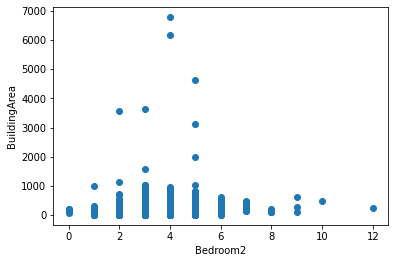

In [143]:
plt.scatter(mel_hou['Bedroom2'], mel_hou['BuildingArea'])
plt.xlabel('Bedroom2')
plt.ylabel('BuildingArea');

In [147]:
mel_hou.corr()[np.abs(mel_hou.corr()) > 0.6]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,NaN,NaN,NaN,0.946747,0.611771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postcode,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedroom2,0.946747,NaN,NaN,NaN,1.000000,0.614838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathroom,0.611771,NaN,NaN,NaN,0.614838,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Landsize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
BuildingArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


rooms and bedrooms are in correlation

In [153]:
bedroom_dict = np.round(mel_hou.groupby(mel_hou['Rooms'])['Bedroom2'].mean())
mel_hou['Bedroom2'] = mel_hou['Bedroom2'].fillna(mel_hou['Rooms'].map(bedroom_dict))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [156]:
bathroom_dict = np.round(mel_hou.groupby(mel_hou['Rooms'])['Bathroom'].mean())
mel_hou['Bathroom'] = mel_hou['Bathroom'].fillna(mel_hou['Rooms'].map(bathroom_dict))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


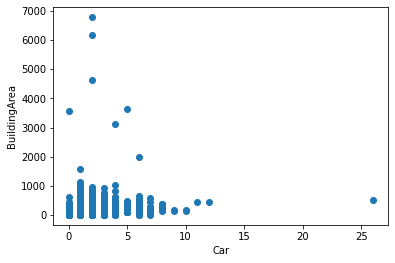

In [160]:
plt.scatter(mel_hou['Car'],mel_hou['BuildingArea'])
plt.xlabel('Car')
plt.ylabel('BuildingArea');

In [165]:
mel_hou[mel_hou['Car'] >11]['Car']

6017     26.0
25839    18.0
31864    12.0
Name: Car, dtype: float64

In [166]:
mel_hou = mel_hou[(mel_hou['Car'] != 18.0) & (mel_hou['Car'] != 26.0)]

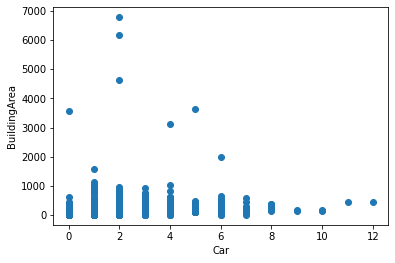

In [168]:
plt.scatter(mel_hou['Car'],mel_hou['BuildingArea'])
plt.xlabel('Car')
plt.ylabel('BuildingArea');

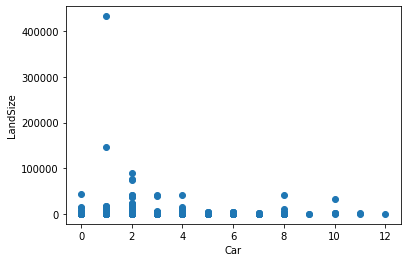

In [170]:
plt.scatter(mel_hou['Car'],mel_hou['Landsize'])
plt.xlabel('Car')
plt.ylabel('LandSize');

In [176]:
# removing outliers using Iqr

## IQR multivariate

q1, q3 = mel_hou.quantile(0.25), mel_hou.quantile(0.75)
IQR = q3 - q1

mel_hou = mel_hou[~((mel_hou < (q1-(2.0*IQR))) | (mel_hou > (q3+(2.0*IQR)))).any(axis=1)]

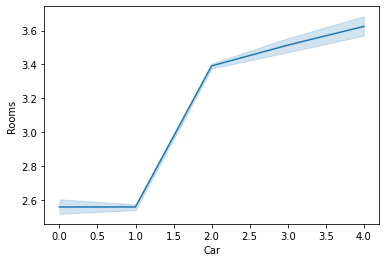

In [185]:
sns.lineplot(mel_hou['Car'],mel_hou['Rooms'])
plt.xlabel('Car')
plt.ylabel('Rooms');

In [187]:
car_dict = np.round(mel_hou.groupby(mel_hou['Rooms'])['Car'].mean())
mel_hou['Car'] = mel_hou['Car'].fillna(mel_hou['Rooms'].map(car_dict))

<BarContainer object of 31562 artists>

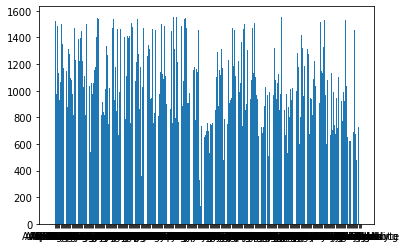

In [189]:
plt.bar(mel_hou['Suburb'],mel_hou['Landsize'])

In [190]:
land_dict = np.round(mel_hou.groupby(mel_hou['Suburb'])['Landsize'].mean())
mel_hou['Landsize'] = mel_hou['Landsize'].fillna(mel_hou['Suburb'].map(land_dict))

In [192]:
building_dict = np.round(mel_hou.groupby(mel_hou['Suburb'])['BuildingArea'].mean())
mel_hou['BuildingArea'] = mel_hou['BuildingArea'].fillna(mel_hou['Suburb'].map(building_dict))

In [201]:
year_dict = np.round(mel_hou.groupby(mel_hou['Suburb'])['YearBuilt'].mean())
mel_hou['YearBuilt'] = mel_hou['Suburb'].fillna(mel_hou['YearBuilt'].map(building_dict))
# year_dict

In [209]:
price_dict = np.round(mel_hou.groupby(mel_hou['Suburb'])['Price'].mean())
mel_hou['Price'] = mel_hou['Suburb'].fillna(mel_hou['Price'].map(price_dict))


In [207]:
from sklearn.impute import KNNImputer

ImportError: cannot import name 'KNNImputer' from 'sklearn.impute' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\__init__.py)

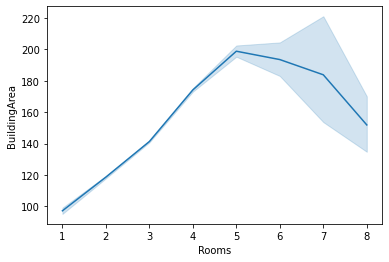

In [213]:
sns.lineplot(mel_hou['Rooms'],mel_hou['BuildingArea'])

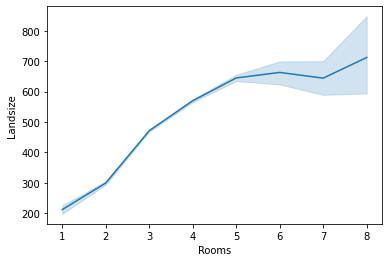

In [214]:
sns.lineplot(mel_hou['Rooms'],mel_hou['Landsize'])

In [215]:
building_dict2 = mel_hou.groupby(mel_hou['Rooms'])['BuildingArea'].mean()
mel_hou['BuildingArea'] = mel_hou['BuildingArea'].fillna(mel_hou['Rooms'].map(building_dict2))

land_dict2 = mel_hou.groupby(mel_hou['Rooms'])['Landsize'].mean()
mel_hou['Landsize'] = mel_hou['Landsize'].fillna(mel_hou['Rooms'].map(land_dict2))

In [217]:
mel_hou[mel_hou['Postcode'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,Fawkner Lot,SP,Brad,6/01/2018,NaN,NaN,...,1.0,2.0,471.30923,141.362305,Fawkner Lot,NaN,NaN,NaN,NaN,NaN


In [221]:
mel_hou = mel_hou.drop(29483)

In [224]:
mel_hou[mel_hou['CouncilArea'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,Footscray,S,Jas,15/07/2017,5.1,3011.0,...,1.0,1.0,213.0,101.0,Footscray,NaN,-37.796,144.891500,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,Camberwell,VB,Jellis,11/11/2017,7.7,3124.0,...,1.0,1.0,549.0,175.0,Camberwell,NaN,-37.841,145.072685,NaN,NaN


In [225]:
mel_hou = mel_hou.drop(18523)
mel_hou = mel_hou.drop(26888)

In [230]:
long_dict1 = dict(mel_hou.groupby(mel_hou['Postcode'])['Longtitude'].median())
mel_hou['Longtitude'] = mel_hou['Longtitude'].fillna(mel_hou['Postcode'].map(long_dict1))


lat_dict1 = dict(mel_hou.groupby(mel_hou['Postcode'])['Lattitude'].median())
mel_hou['Lattitude'] = mel_hou['Lattitude'].fillna(mel_hou['Postcode'].map(lat_dict1))

In [231]:
mel_hou.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64